## Part 2 - C1621568
In Part 2, students are provided with a sentiment analysis dataset (IMDb). The dataset              contains positive and negative movie reviews. Training, development and test splits are            provided. Based on this dataset, students will be asked to preprocess the data, select              features and train a machine learning model of their choice to solve this problem. Students               should include at least three different features to train their model, one of them should be                based on some sort of word frequency. Students can decide the type of frequency (absolute               or relative, normalized or not) and text preprocessing for this mandatory word frequency             feature. The remaining two (or more) features can be chosen freely. Then, students are              asked to perform feature selection to reduce the dimensionality of all features. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import re
import string
import nltk
from string import punctuation
from os import listdir
from collections import Counter

lemmatizer = nltk.stem.WordNetLemmatizer()
import sklearn
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
import matplotlib.pyplot as plt

### Importing Files
Firstly the given files are imported, this was performed using pandas.

In [2]:
imdb_train_pos=pd.read_csv('imdb_train_pos.txt', sep="\n", header=None, names=['text'])
#imdb_train_pos['label']=1
#print(imdb_train_pos)
imdb_train_neg=pd.read_csv('imdb_train_neg.txt', sep="\n", header=None, names=['text'])
imdb_test_pos=pd.read_csv('imdb_test_pos.txt', sep="\n", header=None, names=['text'])
imdb_test_neg=pd.read_csv('imdb_test_neg.txt', sep="\n", header=None, names=['text'])
imdb_dev_pos=pd.read_csv('imdb_dev_pos.txt', sep="\n", header=None, names=['text'])
imdb_dev_neg=pd.read_csv('imdb_dev_neg.txt', sep="\n", header=None, names=['text'])

A function called **review_combination** has been made.<br>
The function takes each inputed positive and negative review for the training, testing and dev data sets and gives the positve reviews scores of 1 and the negative reviews scores of 0, as shown in the 'labels' column. Once this has been done, the two data sets (positive and negative) are combined together to create a full training, testing and dev data set. These data sets are then shuffled to minimise any bias.

In [3]:
def review_combination(positive_review, negative_review):
    positive = pd.read_csv(positive_review, sep="\n", header=None, names=['text'])
    positive['label']=1
    negative = pd.read_csv(negative_review, sep="\n", header=None, names=['text'])
    negative['label']=0
    combine = positive.append(negative)
    combine = shuffle(combine, random_state=42)
    return(combine)

Defining new combined data sets using the afformentioned function. Also, printing the first 5 rows of the new data set to ensure the function has executed correctly.

In [4]:
train_data=review_combination('imdb_train_pos.txt','imdb_train_neg.txt')
print('Training Data \n -------- \n',train_data.head(),'\n')
test_data=review_combination('imdb_test_pos.txt','imdb_test_neg.txt')
print('Testing Data \n -------- \n',test_data.head(),'\n')
dev_data=review_combination('imdb_dev_pos.txt','imdb_dev_neg.txt')
print('Development Data \n -------- \n',dev_data.head(),'\n')
print('The size of the Training data set is:',len(train_data),'of which:',len(imdb_train_pos),'are Positive reviews and:',len(imdb_train_neg),'are Negative reviews.')
print('The size of the Test data set is:',len(test_data),'of which:',len(imdb_test_pos),'are Positive reviews and:',len(imdb_test_neg),'are Negative reviews.')
print('The size of the Dev data set is:',len(dev_data),'of which:',len(imdb_dev_pos),'are Positive reviews and:',len(imdb_dev_neg),'are Negative reviews.')

Training Data 
 -------- 
                                                    text  label
4016  This is a comedy/romance movie directed by And...      0
6475  During the Sci-Fi TZ marathon of January 31, 1...      1
5684  radio is possibly one of the best films i have...      0
862   I was -Unlike most of the reviewers- not born ...      1
5970  When i started watching "Surface"for the first...      1 

Testing Data 
 -------- 
                                                    text  label
1501  As a child growing up in the Sydney of the 195...      1
87    Jean-Hugh Anglade is excellent as the teenaged...      0
154   I don't think this movie had the effect on me ...      0
1055  I was completely drawn into the story, but I w...      1
705   It's what you expect. It induces laughter, cri...      1 

Development Data 
 -------- 
                                                    text  label
1501  Wallace and Gromit are the main characters in ...      1
68    Excellent example of the 

With the new combined data sets, they can now be pre-processed. The selected methods of pre-processing are:<br>
- Tokenize each word.
- Lemmetize each word and convert it to lowercase.
- Remove stopwords and punctuation.
Using the stopwords (english) import from nltk, a list of common used stopwords can be imported. Using '.add' extra elements to list list can be added, I have chosen to add common punctuation to this.

In [5]:
# take set of stopwords from nltk
stopwords=set(nltk.corpus.stopwords.words('english'))
stopwords.add(".")
stopwords.add("...")
stopwords.add("#")
stopwords.add(",")
stopwords.add("@")
stopwords.add(":")
stopwords.add(":)")
stopwords.add(":(")
stopwords.add(";")
stopwords.add("--")
stopwords.add("``")
stopwords.add("’")
stopwords.add("n't")
stopwords.add("'s")
stopwords.add("''")
stopwords.add("'")
stopwords.add("-")
stopwords.add(")")
stopwords.add("(")
stopwords.add("<")
stopwords.add(">")
stopwords.add("?")
stopwords.add("br")
stopwords.add("!")
stopwords.add("/")

### TFIDF

The TfidVectorizer function from the sklearn library is imported. This is used to convert the reviews into a readable format.<br>
The chosen parameters for the model include removing characters that appear in the stopwords list defined above, checking words for their importance to the document, this is done through ngram_range. It will check individual words as well as coupling words to see how often they appear. Any words that appear in less than 2% are removed, as well as words appearing in more than 85% are removed. This is performed by the min_df and max_df parameters. Finally, the top 850 features are returned and used. 

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
tfidf = TfidfVectorizer(lowercase=True,
                       
                        ngram_range=(1,2),
                        stop_words=stopwords,
                        min_df=0.02,max_df=.85,
                        max_features=850)

tfidf.fit(train_data["text"],train_data["label"])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.85, max_features=850,
                min_df=0.02, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words={'!', '#', "'", "''", "'s", '(', ')', ',', '-', '--',
                            '.', '...', '/', ':', ':(', ':)', ';', '<', '>',
                            '?', '@', '``', 'a', 'about', 'above', 'after',
                            'again', 'against', 'ain', 'all', ...},
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)

#### Check the function has returned the correct ammount of features, printing the ammount of words, as well as the words themselves.
As pre-defined, the top 850 features are returned, therefore the length should be equal to 850.

In [8]:
for i, feature in enumerate(tfidf.get_feature_names()):
    print(i, feature)

0 10
1 20
2 30
3 80
4 able
5 absolutely
6 across
7 act
8 acted
9 acting
10 action
11 actor
12 actors
13 actress
14 actual
15 actually
16 add
17 age
18 ago
19 air
20 almost
21 alone
22 along
23 already
24 also
25 although
26 always
27 amazing
28 america
29 american
30 among
31 annoying
32 another
33 anyone
34 anything
35 anyway
36 apart
37 apparently
38 appear
39 appears
40 around
41 art
42 atmosphere
43 attempt
44 attempts
45 attention
46 audience
47 average
48 avoid
49 away
50 awful
51 back
52 background
53 bad
54 badly
55 based
56 basically
57 beautiful
58 beauty
59 became
60 become
61 becomes
62 begin
63 beginning
64 begins
65 behind
66 believable
67 believe
68 best
69 better
70 beyond
71 big
72 bit
73 black
74 blood
75 body
76 book
77 boring
78 box
79 boy
80 boys
81 break
82 brilliant
83 bring
84 brings
85 british
86 brother
87 brought
88 budget
89 bunch
90 business
91 buy
92 call
93 called
94 came
95 camera
96 cannot
97 car
98 care
99 career
100 case
101 cast
102 caught
103 cause


#### Transform the tfi-df function to each of the 3 text data sets.

In [9]:
train_x_tfidf = tfidf.transform(train_data["text"])
dev_x_tfidf = tfidf.transform(dev_data["text"])
test_x_tfidf = tfidf.transform(test_data["text"])

Timing how long it will take to train a model off of soley using tf-idf.

In [10]:
import time
start = time.time()
svm_clf_sentanalysis=sklearn.svm.SVC(kernel="linear",gamma='auto')
svm_clf=svm_clf_sentanalysis.fit(train_x_tfidf,train_data["label"])
end = time.time()
print("Time to train the model is: %f seconds"%round(((end)- (start)),4))

Time to train the model is: 111.361600 seconds


Test the model with the Development data set.

In [11]:
dev_label_predictions=svm_clf.predict(dev_x_tfidf)
print('Scores',classification_report(dev_data['label'],dev_label_predictions))

Scores               precision    recall  f1-score   support

           0       0.86      0.84      0.85      2482
           1       0.85      0.87      0.86      2518

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



Testing the model through imputting strings synonymous with Positive and Negative reviews to check the models functionality. A mix of both positive and negatvie phrases have been used.

In [12]:
word_search= ["The movie was good","It was great","The movie was bad", "The movie was terrible","The movie was amazing",
              "I loved it","The movie was fun","best film","worst film"]

for i in word_search:
    score_array=svm_clf.predict(tfidf.transform([i]))
    print (i,score_array)

The movie was good [1]
It was great [1]
The movie was bad [0]
The movie was terrible [0]
The movie was amazing [1]
I loved it [1]
The movie was fun [1]
best film [1]
worst film [0]


## With CHI2

#### Performing further feature selection using Chi-sqaured statistics.

In [13]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest, chi2

#### Evaluate the top 400 features from the 850 features gained from tfidf.

In [14]:
X_train_features = train_x_tfidf 
y_train_labels = train_data["label"]
ch2_tfidf = SelectKBest(chi2, k = 400)
X_train_features_fit = ch2_tfidf.fit_transform(X_train_features, y_train_labels)

In [15]:
words=np.asarray(tfidf.get_feature_names())[ch2_tfidf.get_support()]
print(len(words))

400


## Linear Model

In [16]:
start = time.time()
svm_clf_sentanalysis_chi=sklearn.svm.SVC(kernel="linear",gamma='auto')
svm_clf_chi=svm_clf_sentanalysis_chi.fit(X_train_features_fit,train_data["label"])
end = time.time()
print("Time to train the model is: %f seconds"%round(((end)- (start)),4))

Time to train the model is: 42.731500 seconds


In [17]:
fitting_data =svm_clf_chi.fit(X_train_features_fit, train_data["label"])
x_validation_chi2_selected = ch2_tfidf.transform(dev_x_tfidf)

In [18]:
dev_label_predictions=svm_clf_chi.predict(x_validation_chi2_selected)

print('Scores',classification_report(dev_data['label'],dev_label_predictions))
linear_accuracy=accuracy_score(test_data['label'],dev_label_predictions)
linear_f1=f1_score(test_data['label'],dev_label_predictions)
linear_recall=recall_score(test_data['label'],dev_label_predictions)
linear_precision=precision_score(test_data['label'],dev_label_predictions)

Scores               precision    recall  f1-score   support

           0       0.85      0.84      0.85      2482
           1       0.85      0.86      0.85      2518

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



## Polynomial Model

In [19]:
start = time.time()
svm_clf_sentanalysis_chi_poly=sklearn.svm.SVC(kernel="poly", degree=3, coef0=1,gamma='auto')
svm_clf_chi_poly=svm_clf_sentanalysis_chi_poly.fit(X_train_features_fit,train_data["label"])
end = time.time()
print("Time to train the model is: %f seconds"%round(((end)- (start)),4))

Time to train the model is: 127.509000 seconds


In [20]:
fitting_data =svm_clf_chi_poly.fit(X_train_features_fit, train_data["label"])
x_validation_chi2_selected = ch2_tfidf.transform(dev_x_tfidf)

In [21]:
dev_label_predictions=svm_clf_chi_poly.predict(x_validation_chi2_selected)
print('Scores',classification_report(dev_data['label'],dev_label_predictions))
polynomial_accuracy=accuracy_score(test_data['label'],dev_label_predictions)
polynomial_f1=f1_score(test_data['label'],dev_label_predictions)
polynomial_recall=recall_score(test_data['label'],dev_label_predictions)
polynomial_precision=precision_score(test_data['label'],dev_label_predictions)


Scores               precision    recall  f1-score   support

           0       0.86      0.70      0.77      2482
           1       0.75      0.89      0.81      2518

    accuracy                           0.80      5000
   macro avg       0.81      0.79      0.79      5000
weighted avg       0.81      0.80      0.79      5000



## RBF Model

In [22]:
start = time.time()
svm_clf_sentanalysis_chi_rbf=sklearn.svm.SVC(kernel="rbf", gamma='auto')
svm_clf_chi_rbf=svm_clf_sentanalysis_chi_rbf.fit(X_train_features_fit,train_data["label"])
end = time.time()
print("Time to train the model is: %f seconds"%round(((end)- (start)),4))

Time to train the model is: 126.495700 seconds


In [23]:
fitting_data =svm_clf_chi_poly.fit(X_train_features_fit, train_data["label"])
x_validation_chi2_selected = ch2_tfidf.transform(dev_x_tfidf)

In [24]:
dev_label_predictions=svm_clf_chi_rbf.predict(x_validation_chi2_selected)
print('Scores',classification_report(dev_data['label'],dev_label_predictions))
rbf_accuracy=accuracy_score(test_data['label'],dev_label_predictions)
rbf_f1=f1_score(test_data['label'],dev_label_predictions)
rbf_recall=recall_score(test_data['label'],dev_label_predictions)
rbf_precision=precision_score(test_data['label'],dev_label_predictions)

Scores               precision    recall  f1-score   support

           0       0.83      0.74      0.78      2482
           1       0.77      0.85      0.81      2518

    accuracy                           0.80      5000
   macro avg       0.80      0.80      0.80      5000
weighted avg       0.80      0.80      0.80      5000



## Visualing the reseults from the Linear, Polynomial and RBF SVM models. 
<br>
This allows for the appropriate selection of which model should be used to compare the model to the test results.

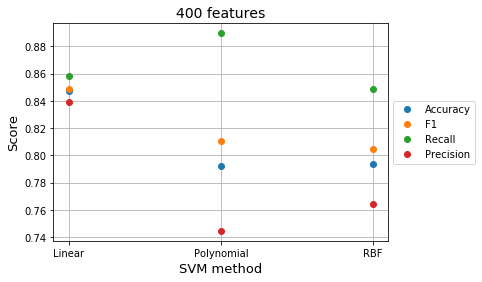

In [25]:
accuracy=np.array([linear_accuracy,polynomial_accuracy,rbf_accuracy])
f1=np.array([linear_f1,polynomial_f1,rbf_f1])
recall=np.array([linear_recall,polynomial_recall,rbf_recall])
precision=np.array([linear_precision,polynomial_precision,rbf_precision])
x=np.array([0,1,2])
methods=['Linear','Polynomial','RBF']
plt.xticks(x,methods)
plt.figure(1)
plt.title('400 features',fontsize='14')
plt.plot(x,accuracy,'o',label='Accuracy')
plt.plot(x,f1,'o',label='F1')
plt.plot(x,recall,'o',label='Recall')
plt.plot(x,precision,'o',label='Precision')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Score',fontsize='13')
plt.xlabel('SVM method',fontsize='13')
plt.grid()

Typical times for changing the features using Chi-squared. These can be reviewed prior to changing the Kbest value. The times are subjective to the machine the script is executed on.

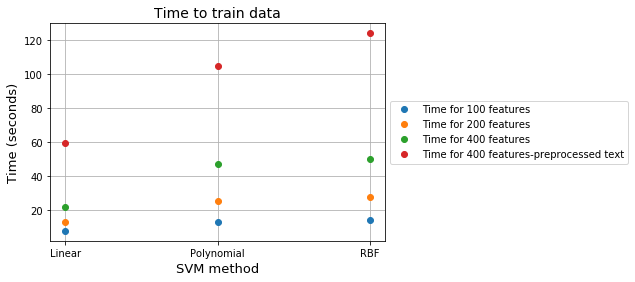

In [26]:
time_100=np.array([7.852100,12.874000,14.157900])
time_200=np.array([13.004600,25.254500,27.686100])
time_300=np.array([22.090200,46.907600,49.979300])
time_token=np.array([59.191300,104.775200,123.876400])
x=np.array([0,1,2])
methods=['Linear','Polynomial','RBF']
plt.xticks(x,methods)
plt.figure(1)
plt.plot(x,time_100,'o',label='Time for 100 features')
plt.plot(x,time_200,'o',label='Time for 200 features')
plt.plot(x,time_300,'o',label='Time for 400 features')
plt.plot(x,time_token,'o',label='Time for 400 features-preprocessed text')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Time (seconds)',fontsize='13')
plt.xlabel('SVM method',fontsize='13')
plt.title('Time to train data',fontsize='14')
plt.grid()

### Finally for the Test data

In [27]:
fitting_data =svm_clf_chi.fit(X_train_features_fit, train_data["label"])
x_validation_chi2_selected = ch2_tfidf.transform(test_x_tfidf)
test_label_predictions=svm_clf_chi.predict(x_validation_chi2_selected)

In [28]:
print('Scores',classification_report(test_data['label'],test_label_predictions))

Scores               precision    recall  f1-score   support

           0       0.86      0.83      0.84      2501
           1       0.83      0.86      0.85      2499

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



In [29]:
print('Scores for the test data set\n-----------------')
print('\nAccuracy:',round(accuracy_score(test_data['label'],test_label_predictions),4))
print('\nF-measure:',round(f1_score(test_data['label'],test_label_predictions),4))
print('\nRecall:',round(recall_score(test_data['label'],test_label_predictions),4))
print('\nPrecision:',round(precision_score(test_data['label'],test_label_predictions),4))

Scores for the test data set
-----------------

Accuracy: 0.8466

F-measure: 0.8493

Recall: 0.8647

Precision: 0.8344


In [30]:
tn, fp, fn, tp= sklearn.metrics.confusion_matrix(test_label_predictions,test_data['label']).ravel()
print('\nTrue Negative:',tn)
print('\nFalse Positive:',fp)
print('\nFalse Negative:',fn)
print('\nTrue Positive:',tp)


True Negative: 2072

False Positive: 338

False Negative: 429

True Positive: 2161
